In [3]:
import pandas as pd
laptops = pd.read_csv("laptops.csv",sep=';',decimal=',',header=0)

In [4]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpuGeneration  852 non-null    object 
 1   cpuType        853 non-null    object 
 2   RAM            855 non-null    float64
 3   diskspace      851 non-null    float64
 4   brand          856 non-null    object 
dtypes: float64(2), object(3)
memory usage: 33.6+ KB


In [5]:
brands = ['Acer','Apple','Asus','Dell','HP','Lenovo','Medion','Toshiba']
laptops.brand=pd.Categorical(laptops.brand,categories = brands)

In [6]:
cpuGen = ['Sandy Bridge','Ivy Bridge','Haswell','Broadwell','Skylake','Kabylake']
laptops['cpuGeneration']=laptops['cpuGeneration'].astype(pd.CategoricalDtype(categories=cpuGen,ordered=True))
cpuTypeLevels=['i3','i5','i7']
laptops.cpuType=pd.Categorical(laptops.cpuType,ordered=True,categories=cpuTypeLevels)

In [7]:
# FREQUENCIES

In [8]:
laptops.cpuType.value_counts()

i5    556
i3    213
i7     84
Name: cpuType, dtype: int64

In [9]:
laptops.cpuType.value_counts(dropna=False)

i5     556
i3     213
i7      84
NaN      4
Name: cpuType, dtype: int64

In [10]:
laptops.cpuType.value_counts().sort_index() # absolute freqs

i3    213
i5    556
i7     84
Name: cpuType, dtype: int64

In [11]:
laptops.brand.value_counts(normalize=True)

HP         0.227804
Dell       0.188084
Acer       0.151869
Toshiba    0.151869
Lenovo     0.091121
Apple      0.075935
Asus       0.075935
Medion     0.037383
Name: brand, dtype: float64

In [12]:
(laptops.brand.value_counts(normalize=True)*100).round(1) # relative freqs

HP         22.8
Dell       18.8
Acer       15.2
Toshiba    15.2
Lenovo      9.1
Apple       7.6
Asus        7.6
Medion      3.7
Name: brand, dtype: float64

In [13]:
laptops.cpuGeneration.value_counts().sort_index().cumsum() # absolute cumulative frequency

Sandy Bridge     63
Ivy Bridge      170
Haswell         336
Broadwell       554
Skylake         709
Kabylake        852
Name: cpuGeneration, dtype: int64

In [14]:
(laptops.cpuGeneration.value_counts(normalize=True).sort_index().cumsum()*100).round(1) # cumulative percentages

Sandy Bridge      7.4
Ivy Bridge       20.0
Haswell          39.4
Broadwell        65.0
Skylake          83.2
Kabylake        100.0
Name: cpuGeneration, dtype: float64

In [15]:
# function that gets a vector as a parameter and puts all frequencies in a table
def all_freq(x):
    t_abs=x.value_counts(dropna=False).sort_index()
    t_rel=(x.value_counts(dropna=False,normalize=True).sort_index()*100).round(1)
    t_abs_cum = x.value_counts(dropna=False).sort_index().cumsum()
    t_rel_cum = (x.value_counts(dropna=False,normalize=True).sort_index().cumsum()*100).round(1)
    return pd.DataFrame({'abs freq':t_abs,'rel freq:':t_rel , 'abs cum freq':t_abs_cum , 'rel cum freq':t_rel_cum})
all_freq(laptops.cpuGeneration)

,abs freq,rel freq:,abs cum freq,rel cum freq
Sandy Bridge,63,7.4,63,7.4
Ivy Bridge,107,12.5,170,19.8
Haswell,166,19.4,336,39.2
Broadwell,218,25.4,554,64.6
Skylake,155,18.1,709,82.7
Kabylake,143,16.7,852,99.4
NaN,5,0.6,857,100.0


In [16]:
# CROSS TABLES
# one dimensional table

In [17]:
laptops.cpuType.value_counts(dropna=False).sort_index()

i3     213
i5     556
i7      84
NaN      4
Name: cpuType, dtype: int64

In [18]:
# multidimensional table

In [19]:
pd.crosstab(laptops.brand,laptops.cpuType,margins=True)

cpuType,i3,i5,i7,All
brand,,,,
Acer,39,80,10,129
Apple,16,41,8,65
Asus,17,43,5,65
Dell,47,98,16,161
HP,43,132,17,192
Lenovo,15,53,10,78
Medion,8,22,2,32
Toshiba,27,87,16,130
All,212,556,84,852


In [20]:
pd.crosstab([laptops.brand,laptops.cpuType],laptops.RAM,margins=True)

RAM              1.0  2.0  4.0  8.0  16.0  All
brand   cpuType                               
Acer    i3         4    5   14    9     7   39
        i5         8   15   32   13    12   80
        i7         3    0    7    0     0   10
Apple   i3         1    4    6    2     3   16
        i5         1    4   19   12     4   40
        i7         0    0    3    2     3    8
Asus    i3         0    3    5    5     4   17
        i5         2    5   13   12    11   43
        i7         0    2    1    2     0    5
Dell    i3         4   10   11   14     8   47
        i5        10   15   34   30     9   98
        i7         1    2    4    5     4   16
HP      i3         0    8   20   11     4   43
        i5        12   16   49   28    27  132
        i7         4    1    5    6     1   17
Lenovo  i3         0    2    7    5     1   15
        i5         4   10   21   12     5   52
        i7         2    2    3    2     1   10
Medion  i3         1    2    1    2     2    8
        i5         2    4    8    8     0   22
        i7         2    0    0    0     0    2
Toshiba i3         3    7   10    4     3   27
        i5         7   14   37   14    15   87
        i7         2    3    7    3     1   16
All               73  134  317  201   125  850

In [21]:
# CLASSES
cutpoints = range(0,1200,100)
classes = pd.cut(laptops.diskspace, bins=cutpoints)
classes.value_counts().sort_index()

(0, 100]         29
(100, 200]       52
(200, 300]      407
(300, 400]        0
(400, 500]      227
(500, 600]       96
(600, 700]        0
(700, 800]        0
(800, 900]        0
(900, 1000]      19
(1000, 1100]     21
Name: diskspace, dtype: int64

In [22]:
# CHARTS AND PIES AND PIE CHARTS

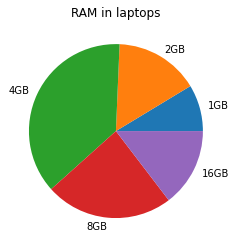

In [23]:
import matplotlib.pyplot as plt
x = laptops.RAM.value_counts().sort_index()
lab = ['1GB','2GB','4GB','8GB','16GB']
plt.figure()
plt.pie(x, labels=lab)
plt.title('RAM in laptops')
plt.show()

In [23]:
# BAR GRAPH

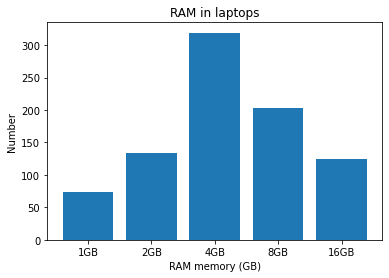

In [24]:
x = laptops.RAM.value_counts().sort_index()
lab = ['1GB','2GB','4GB','8GB','16GB']
plt.figure()
plt.bar(lab,x)
plt.title('RAM in laptops')
plt.xlabel('RAM memory (GB)')
plt.ylabel('Number')
plt.show()

<Figure size 432x288 with 0 Axes>

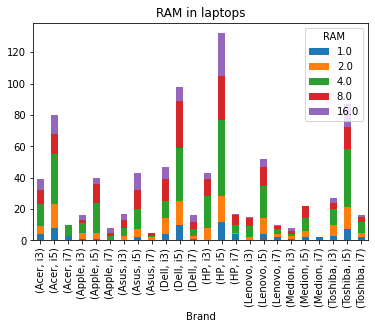

In [25]:
plt.figure()
ctC = pd.crosstab([laptops.brand, laptops.cpuType], laptops.RAM, margins=False)
ctC.plot.bar(title='RAM in laptops', xlabel='Brand',stacked=True)
plt.show()

In [26]:
# HISTOGRAM

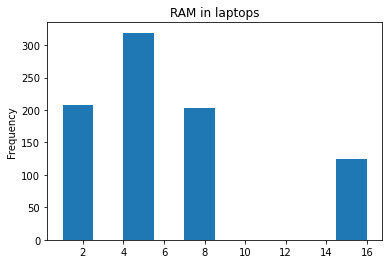

In [27]:
plt.figure()
laptops.RAM.plot.hist(title='RAM in laptops', xlabel = 'Disk space (GB)', ylabel = 'Frequency', stacked=True)
plt.show()

In [ ]:
cutpoints = [0,185,375,750,1100]
plt.figure()
laptops.diskspace.plot.hist(bins=cutpoints, title='Diskspace in laptops', xlabel='Disk space (GB)',ylabel='Frequency',stacked=True)
plt.show()